In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import SGD

In [2]:
df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/traffic.csv')

In [3]:
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [7]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

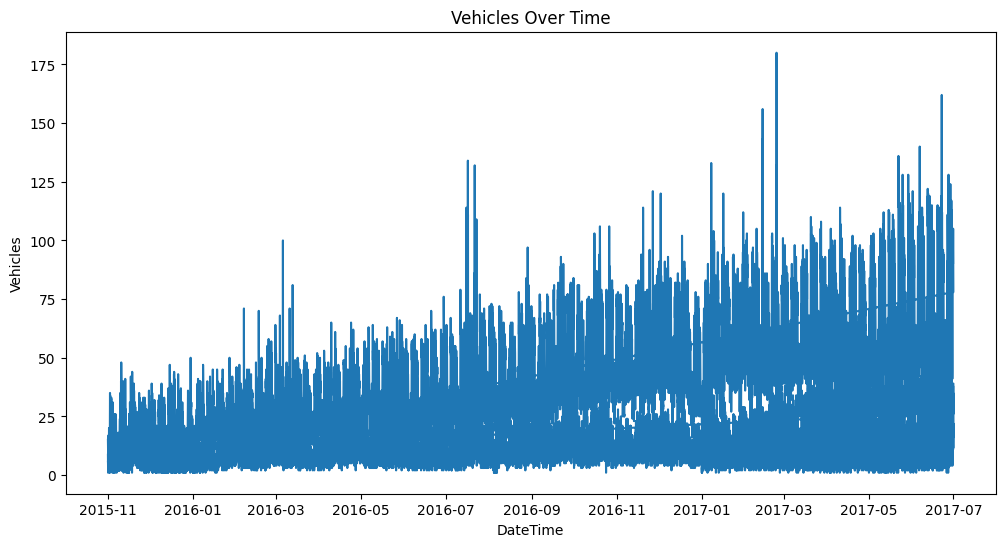

In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Vehicles'])
plt.title('Vehicles Over Time')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


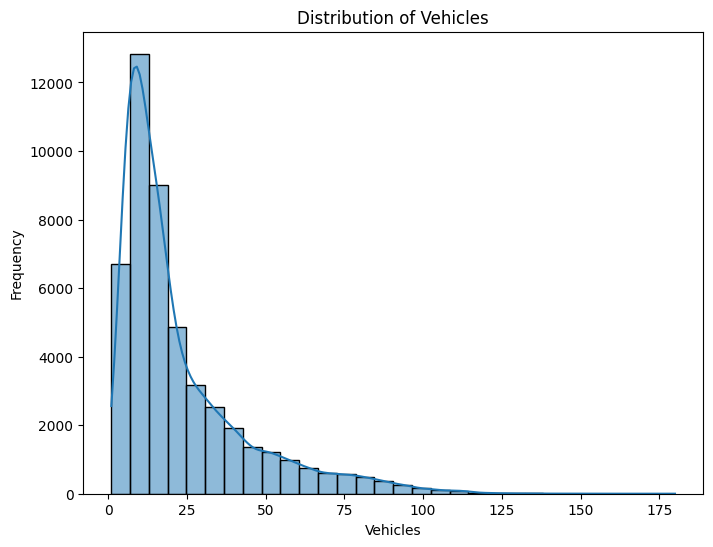

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Vehicles'], bins=30, kde=True)
plt.title('Distribution of Vehicles')
plt.xlabel('Vehicles')
plt.ylabel('Frequency')
plt.show()

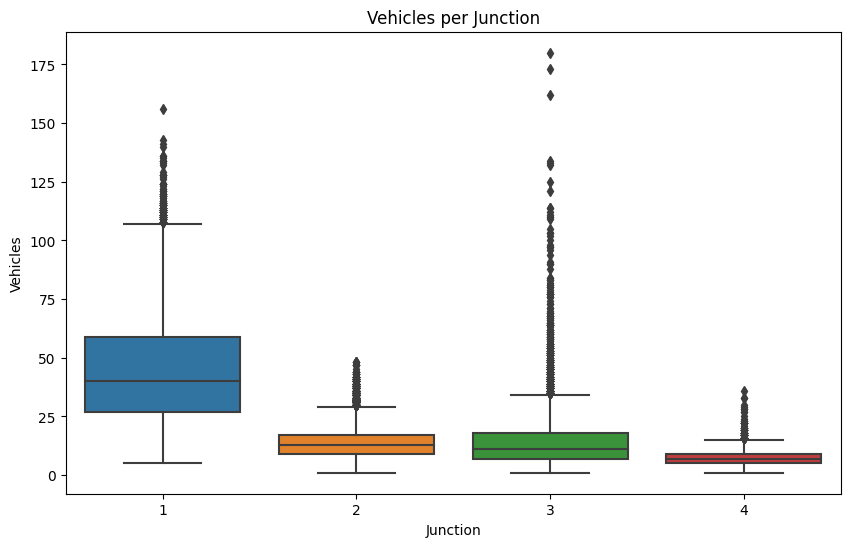

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Junction', y='Vehicles', data=df)
plt.title('Vehicles per Junction')
plt.xlabel('Junction')
plt.ylabel('Vehicles')
plt.show()

In [11]:
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

<ipython-input-12-4524509822b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Vehicles', data=df, estimator='sum', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


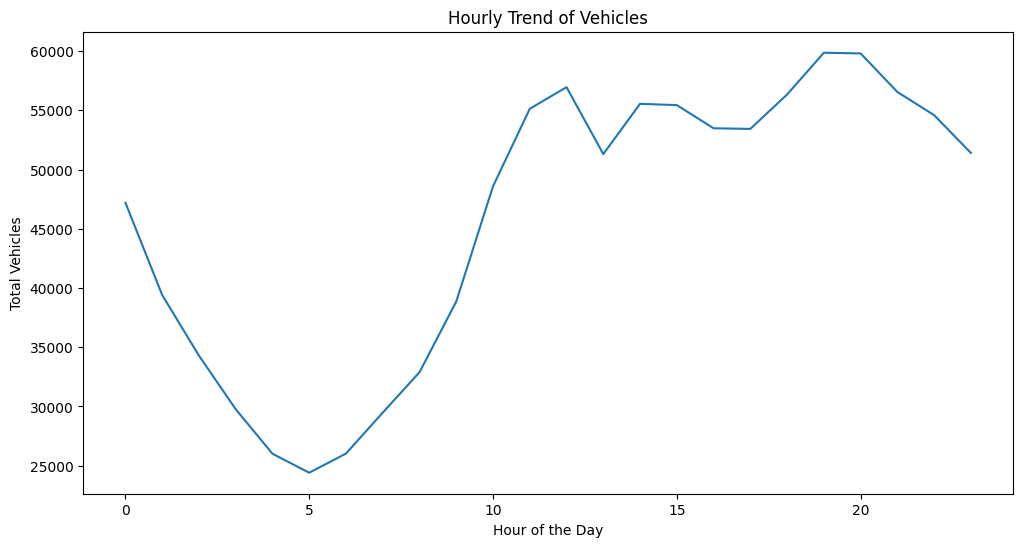

In [12]:
# Hourly trend of vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Vehicles', data=df, estimator='sum', ci=None)
plt.title('Hourly Trend of Vehicles')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicles')
plt.show()

<ipython-input-13-9868cf798b38>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Day', y='Vehicles', data=df, estimator='sum', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


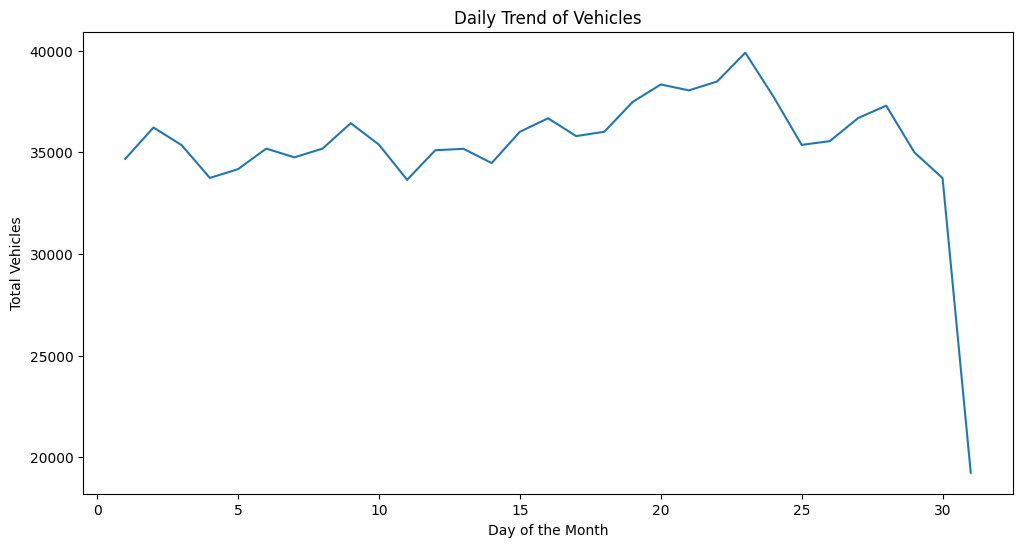

In [13]:
# Daily trend of vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(x='Day', y='Vehicles', data=df, estimator='sum', ci=None)
plt.title('Daily Trend of Vehicles')
plt.xlabel('Day of the Month')
plt.ylabel('Total Vehicles')
plt.show()

<ipython-input-14-7e4865db2e90>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Vehicles', data=df, estimator='sum', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


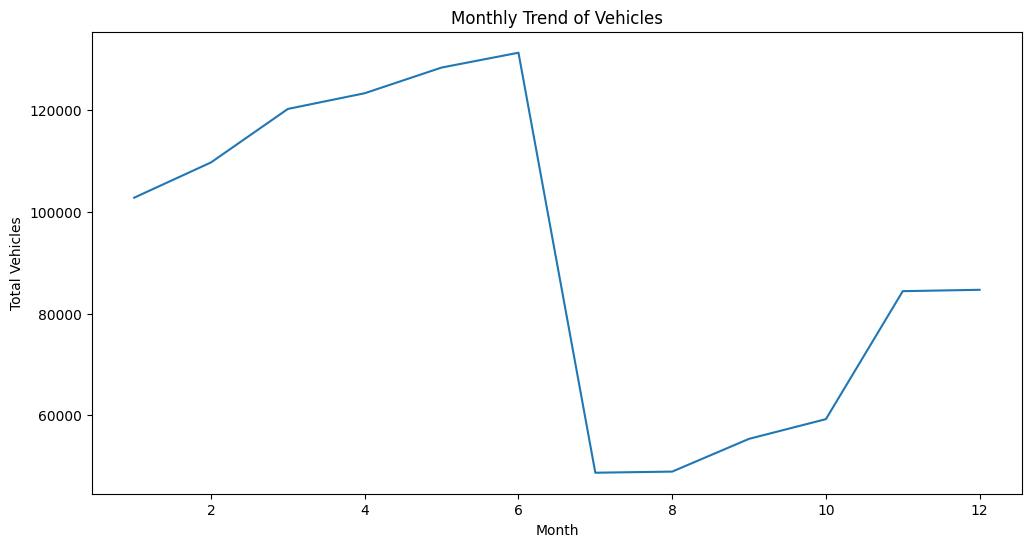

In [14]:
# Monthly trend of vehicles
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Vehicles', data=df, estimator='sum', ci=None)
plt.title('Monthly Trend of Vehicles')
plt.xlabel('Month')
plt.ylabel('Total Vehicles')
plt.show()

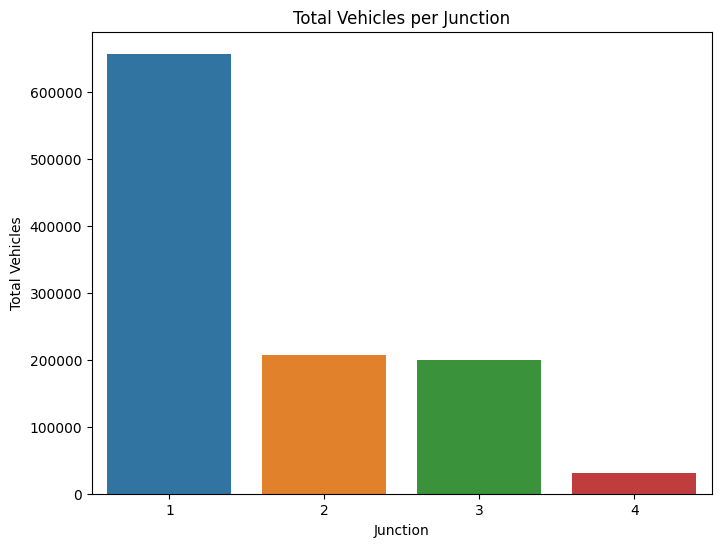

In [15]:
# Total vehicles per junction
junction_traffic = df.groupby('Junction')['Vehicles'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Junction', y='Vehicles', data=junction_traffic)
plt.title('Total Vehicles per Junction')
plt.xlabel('Junction')
plt.ylabel('Total Vehicles')
plt.show()

<ipython-input-16-20333fedd1c9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Vehicles', hue='Junction', data=df, estimator='sum', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this wa

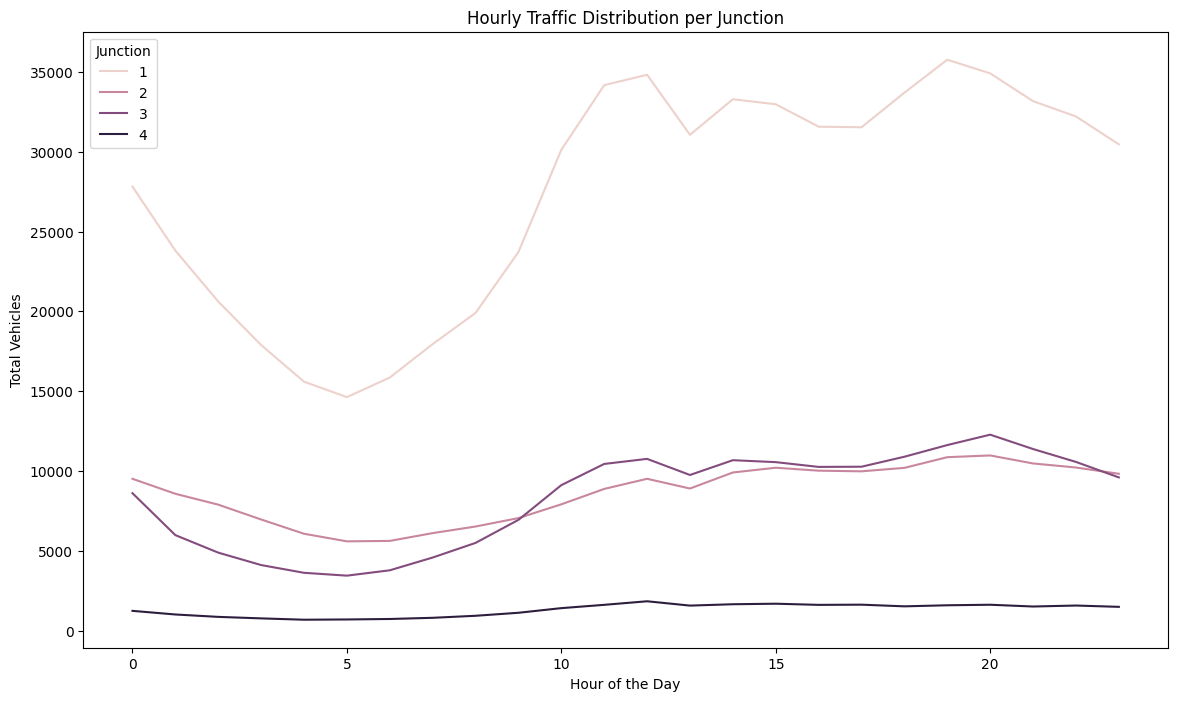

In [16]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Hour', y='Vehicles', hue='Junction', data=df, estimator='sum', ci=None)
plt.title('Hourly Traffic Distribution per Junction')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Vehicles')
plt.legend(title='Junction')
plt.show()

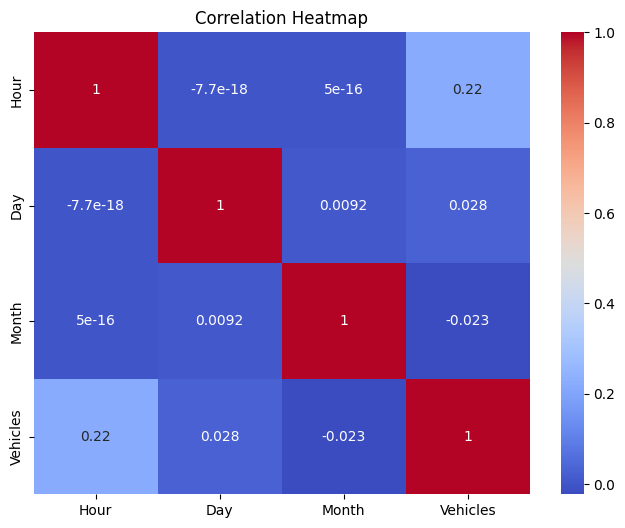

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Hour', 'Day', 'Month', 'Vehicles']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Peak Hours for Each Junction:
     Junction  Hour  Vehicles
19         1    19     35753
44         2    20     10981
68         3    20     12282
84         4    12      1853


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

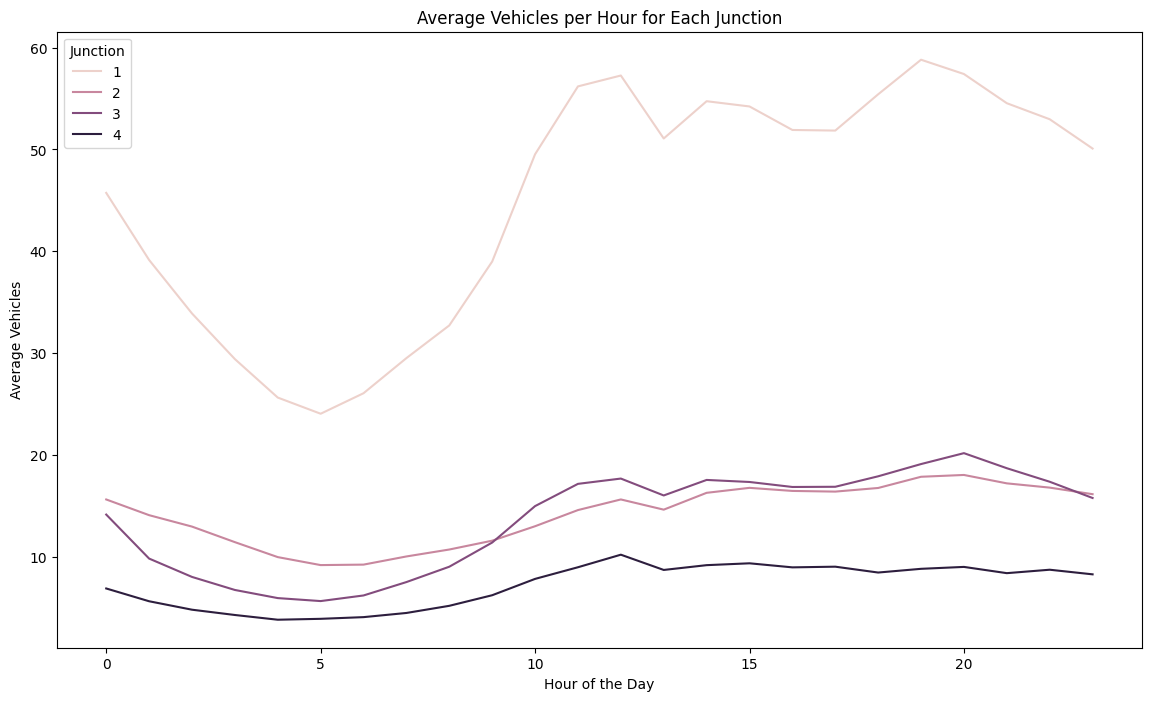

In [18]:
peak_hours = df.groupby(['Junction', 'Hour'])['Vehicles'].sum().reset_index()
peak_hours = peak_hours.loc[peak_hours.groupby('Junction')['Vehicles'].idxmax()]
print("Peak Hours for Each Junction:\n", peak_hours)

# Average vehicles per hour for each junction
avg_vehicles_per_hour = df.groupby(['Junction', 'Hour'])['Vehicles'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(x='Hour', y='Vehicles', hue='Junction', data=avg_vehicles_per_hour)
plt.title('Average Vehicles per Hour for Each Junction')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Vehicles')
plt.legend(title='Junction')
plt.show()

In [19]:
df = df.sort_values('DateTime')
#Z-score Normalization
df['Vehicles_Zscore'] = zscore(df['Vehicles'])

In [20]:
df

,DateTime,Junction,Vehicles,ID,Hour,Day,Month,DayOfWeek,Vehicles_Zscore
0,2015-11-01 00:00:00,1,15,20151101001,0,1,11,6,-0.375489
14592,2015-11-01 00:00:00,2,6,20151101002,0,1,11,6,-0.809227
29184,2015-11-01 00:00:00,3,9,20151101003,0,1,11,6,-0.664648
29185,2015-11-01 01:00:00,3,7,20151101013,1,1,11,6,-0.761034
1,2015-11-01 01:00:00,1,13,20151101011,1,1,11,6,-0.471875
...,...,...,...,...,...,...,...,...,...
43774,2017-06-30 22:00:00,3,26,20170630223,22,30,6,4,0.154636
14591,2017-06-30 23:00:00,1,78,20170630231,23,30,6,4,2.660678
43775,2017-06-30 23:00:00,3,39,20170630233,23,30,6,4,0.781146
29183,2017-06-30 23:00:00,2,27,20170630232,23,30,6,4,0.202829


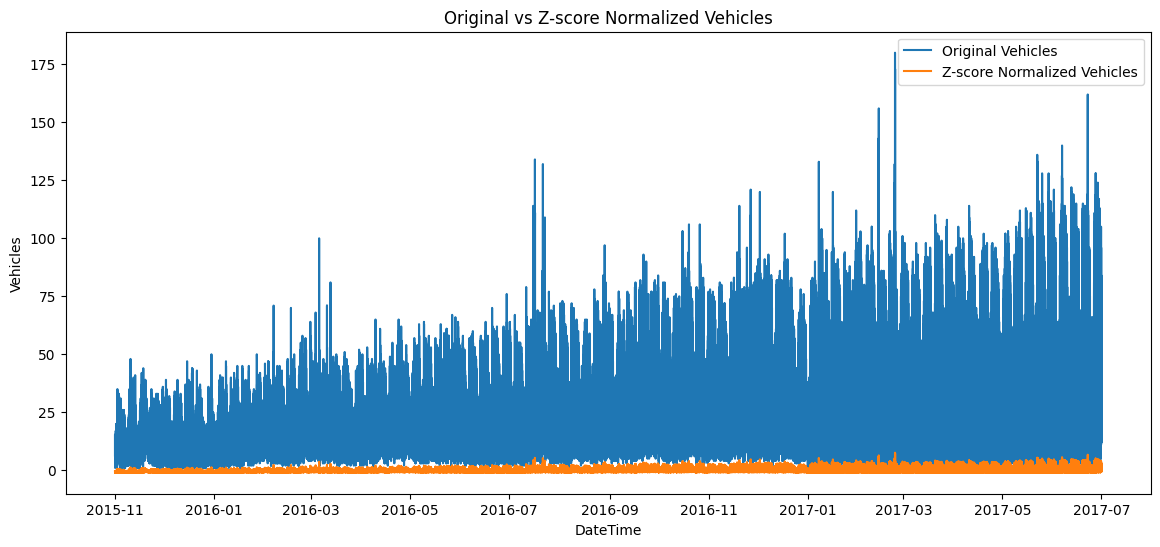

In [21]:
# Plot original vs normalized data
plt.figure(figsize=(14, 6))
plt.plot(df['DateTime'], df['Vehicles'], label='Original Vehicles')
plt.plot(df['DateTime'], df['Vehicles_Zscore'], label='Z-score Normalized Vehicles')
plt.title('Original vs Z-score Normalized Vehicles')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

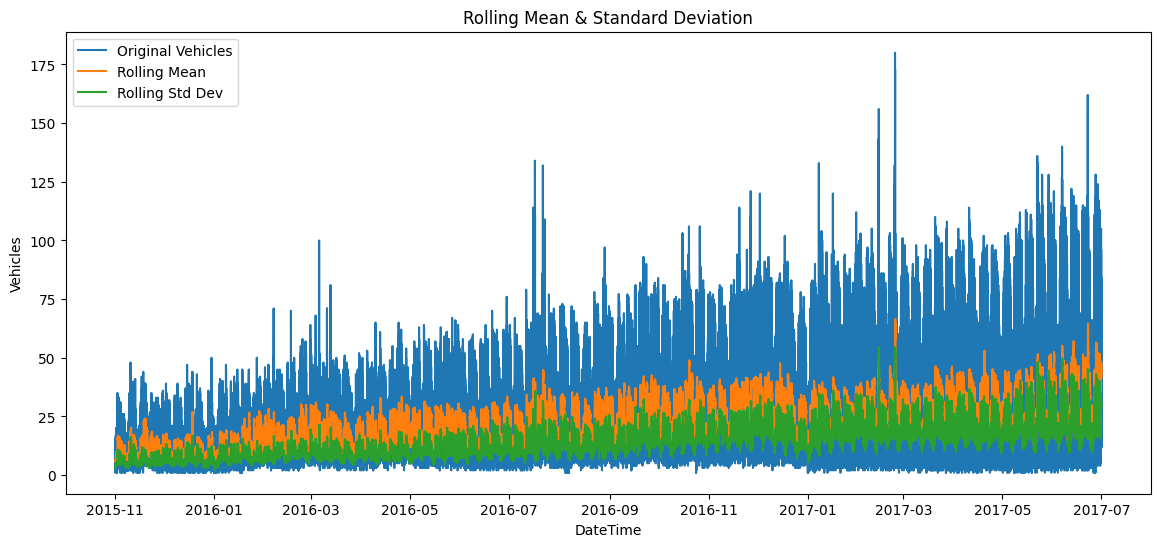

In [22]:
# Step 2: Stationarity Check (Rolling Statistics)
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['Vehicles'].rolling(window=24).mean()  # 24-hour window
rolling_std = df['Vehicles'].rolling(window=24).std()

# Plot rolling statistics
plt.figure(figsize=(14, 6))
plt.plot(df['DateTime'], df['Vehicles'], label='Original Vehicles')
plt.plot(df['DateTime'], rolling_mean, label='Rolling Mean')
plt.plot(df['DateTime'], rolling_std, label='Rolling Std Dev')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

In [23]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis: Data is stationary.")
    else:
        print("Fail to reject the null hypothesis: Data is non-stationary.")

print("ADF Test for Original Vehicles Data:")
adf_test(df['Vehicles'])

print("\nADF Test for Z-score Normalized Vehicles Data:")
adf_test(df['Vehicles_Zscore'])

ADF Test for Original Vehicles Data:
ADF Statistic: -15.432067939290874
p-value: 2.939580482330495e-28
Critical Values:
   1%: -3.430486066940443
   5%: -2.8616001387397922
   10%: -2.566802009871527
Reject the null hypothesis: Data is stationary.

ADF Test for Z-score Normalized Vehicles Data:
ADF Statistic: -15.432067939290532
p-value: 2.9395804823334433e-28
Critical Values:
   1%: -3.430486066940443
   5%: -2.8616001387397922
   10%: -2.566802009871527
Reject the null hypothesis: Data is stationary.


In [24]:
# Function to perform ADF test and return results as a dictionary
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Values': result[4]
    }

results = []
#griupby junction
for junction, group in df.groupby('Junction'):
    adf_result = adf_test(group['Vehicles'])
    results.append({
        'Junction': junction,
        'ADF Statistic': adf_result['ADF Statistic'],
        'p-value': adf_result['p-value'],
        'Critical Value 1%': adf_result['Critical Values']['1%'],
        'Critical Value 5%': adf_result['Critical Values']['5%'],
        'Critical Value 10%': adf_result['Critical Values']['10%']
    })

results_df = pd.DataFrame(results)
results_df.to_csv('adf_results_by_junction.csv', index=False)

In [25]:
adft_results = pd.read_csv('/kaggle/working/adf_results_by_junction.csv')
adft_results.head()

,Junction,ADF Statistic,p-value,Critical Value 1%,Critical Value 5%,Critical Value 10%
0,1,-7.148078,3.193843e-10,-3.430800,-2.861739,-2.566876
1,2,-8.041077,1.846368e-12,-3.430800,-2.861739,-2.566876
2,3,-8.236600,5.867296e-13,-3.430800,-2.861739,-2.566876
3,4,-6.726732,3.374875e-09,-3.431867,-2.862210,-2.567127


In [26]:
data = df[['Junction', 'Vehicles']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [27]:
# Create sequences for the model
def create_sequences(data, seq_length):
    X, y, junction_info = [], [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Use all columns except the last as features
        y.append(data[i+seq_length, -1])    # Use the last column as the target
        junction_info.append(df.iloc[i + seq_length]['Junction'])  # Track junction information
    return np.array(X), np.array(y), np.array(junction_info)

seq_length = 24  # Sequence length
X, y, junction_info = create_sequences(data_scaled, seq_length)

In [28]:
# Split the data into training and testing sets with stratification on junction_info
X_train, X_test, y_train, y_test, junction_train, junction_test = train_test_split(
    X, y, junction_info, test_size=0.2, random_state=42, stratify=junction_info
)

# Verify that all junctions are present in both training and testing sets
print("Unique junctions in training set:", np.unique(junction_train))
print("Unique junctions in testing set:", np.unique(junction_test))

Unique junctions in training set: [1 2 3 4]
Unique junctions in testing set: [1 2 3 4]


In [29]:
# Build and Train LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0124 - val_loss: 0.0109
Epoch 2/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 3/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 4/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 5/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 6/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 7/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 8/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 9/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 10/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 11/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 12

In [31]:
# Build and Train GRU Model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')

In [32]:
gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 2/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 3/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 4/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 5/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 6/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 7/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 8/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0105 - val_loss: 0.0112
Epoch 9/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 10/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 11/20
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0105 - val_loss: 0.0104
Epoch 12

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
RMSE for Junction 1: 27.354195843878735
RMSE for Junction 2: 9.728844425976066
RMSE for Junction 3: 12.780541849023686
RMSE for Junction 4: 16.93955864147374


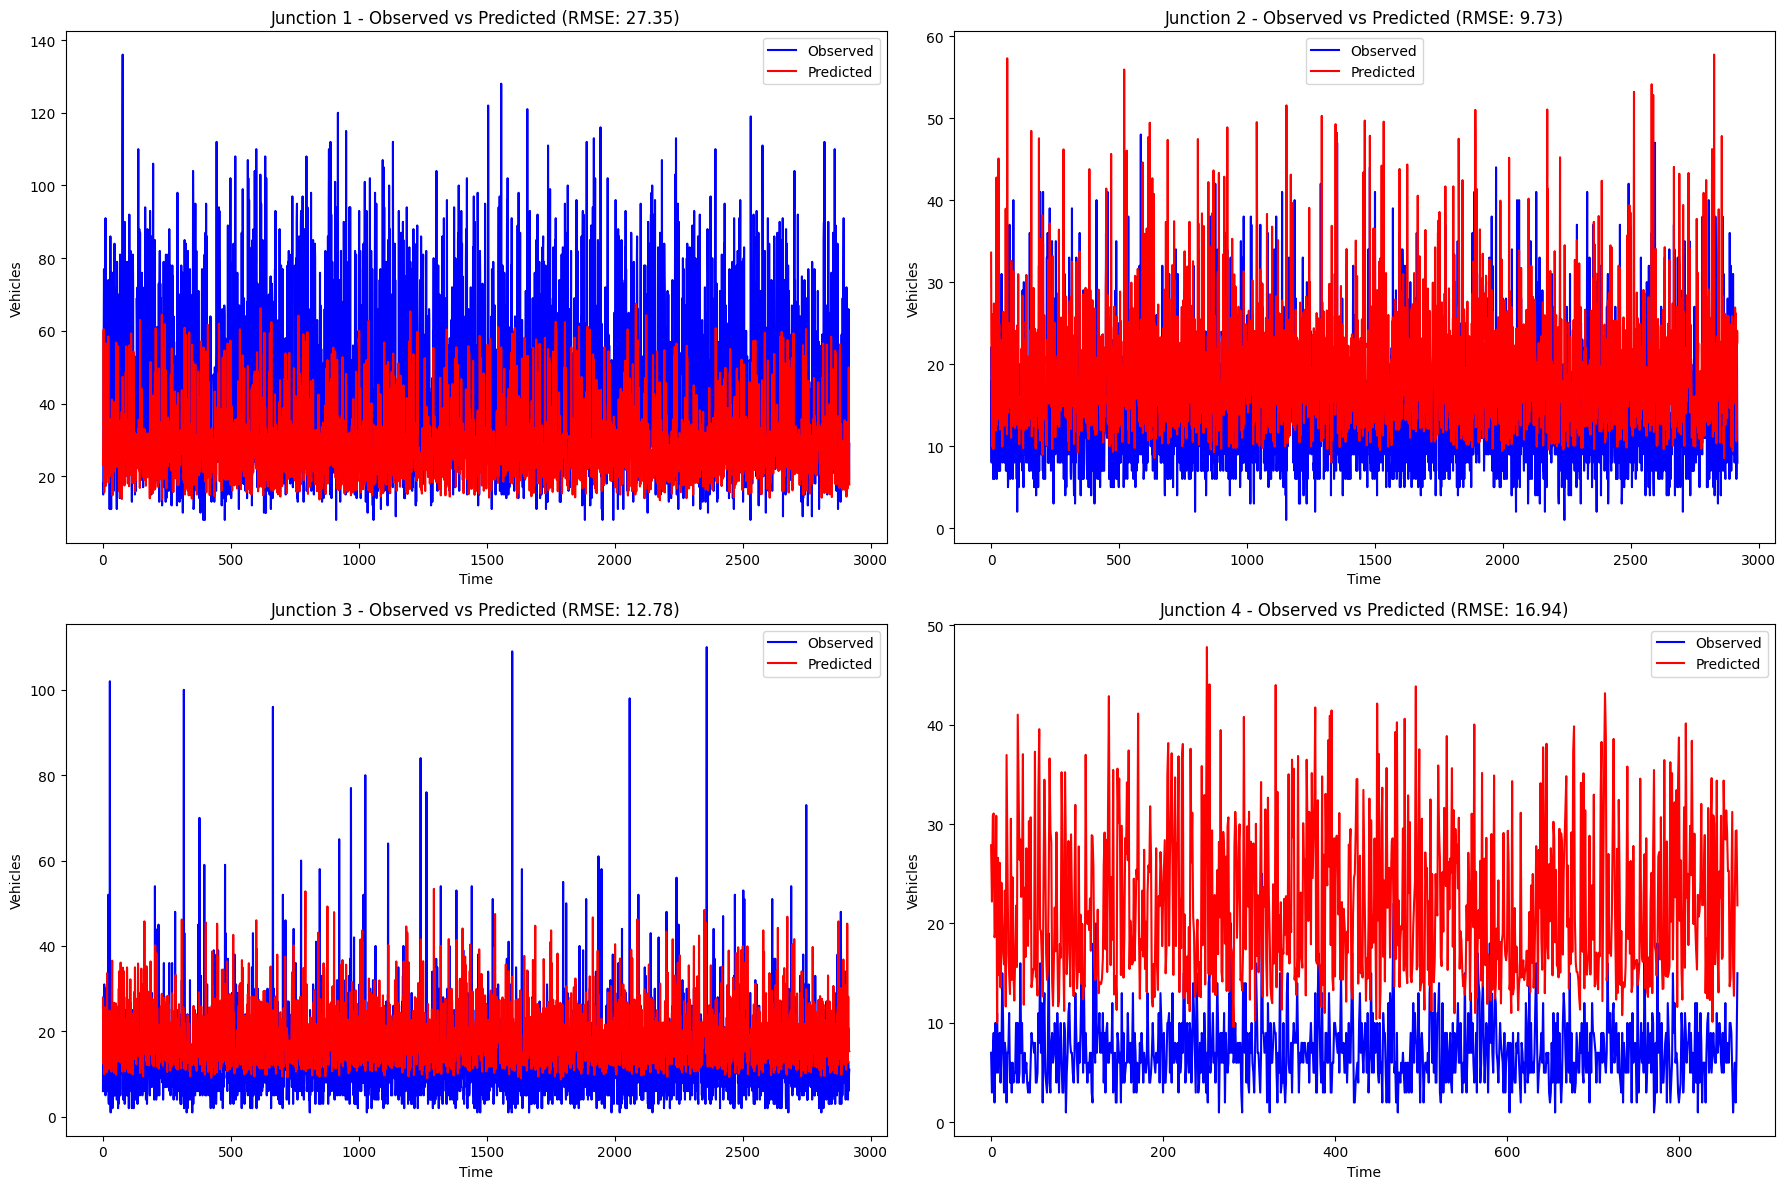

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict using LSTM
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_lstm_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred_lstm), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Get unique junctions
junctions = df['Junction'].unique()

# Create a figure with subplots for each junction
plt.figure(figsize=(18, 12))

# Calculate RMSE and plot for each junction
for i, junction in enumerate(junctions, 1):
    # Filter test data for the current junction using junction_test
    junction_mask = junction_test == junction
    junction_y_test_actual = y_test_actual[junction_mask]
    junction_y_pred_actual = y_pred_lstm_actual[junction_mask]
    
    if len(junction_y_test_actual) > 0:
        # Calculate RMSE for the current junction
        junction_rmse = np.sqrt(mean_squared_error(junction_y_test_actual, junction_y_pred_actual))
        print(f"RMSE for Junction {junction}: {junction_rmse}")
        
        # Plot observed vs predicted for the current junction
        plt.subplot(2, 2, i)
        plt.plot(junction_y_test_actual, label='Observed', color='blue')
        plt.plot(junction_y_pred_actual, label='Predicted', color='red')
        plt.title(f'Junction {junction} - Observed vs Predicted (RMSE: {junction_rmse:.2f})')
        plt.xlabel('Time')
        plt.ylabel('Vehicles')
        plt.legend()
    else:
        # If no test data for the junction, create an empty subplot
        plt.subplot(2, 2, i)
        plt.title(f'Junction {junction} - No Test Data')
        plt.xlabel('Time')
        plt.ylabel('Vehicles')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
RMSE for Junction 1 (GRU): 27.964472568867897
RMSE for Junction 2 (GRU): 9.376597269726055
RMSE for Junction 3 (GRU): 12.490461358473725
RMSE for Junction 4 (GRU): 15.503302918698834


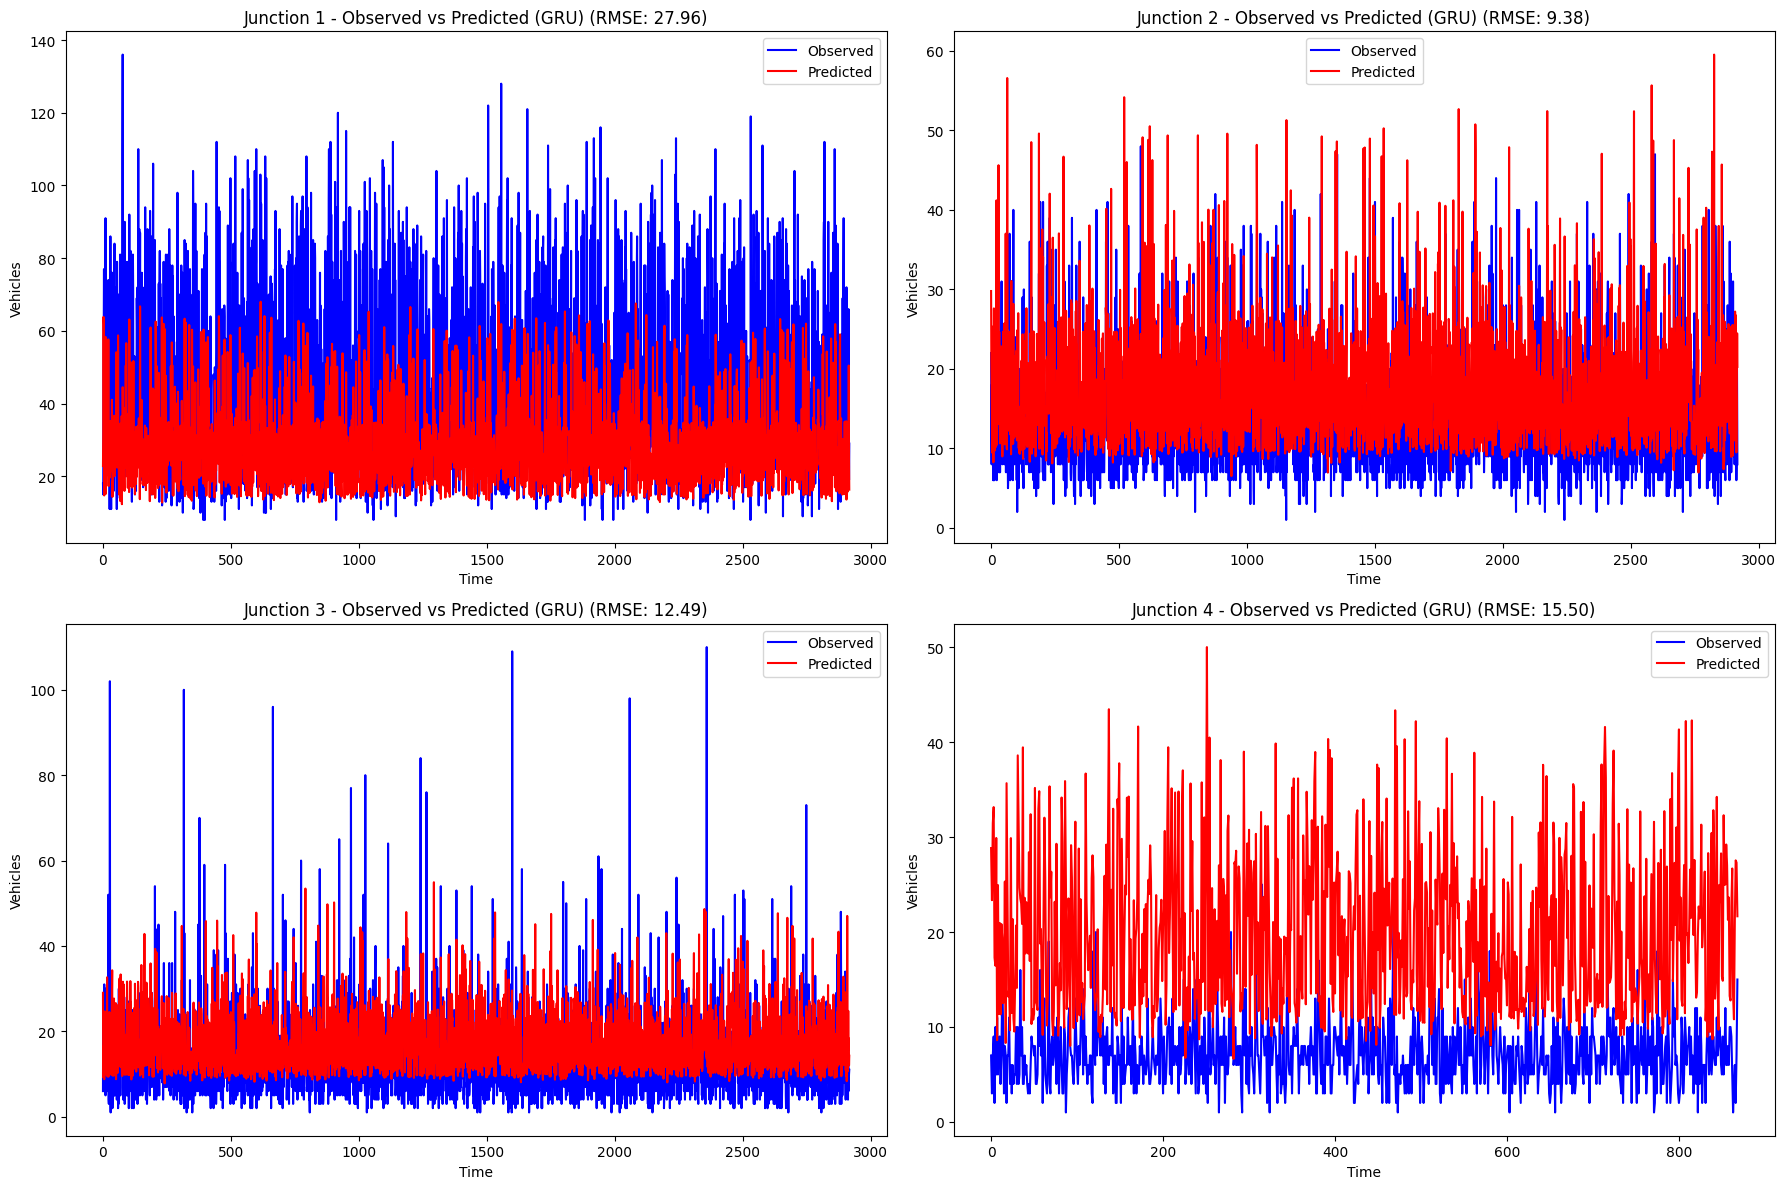

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict using GRU
y_pred_gru = gru_model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_gru_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred_gru), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Get unique junctions
junctions = df['Junction'].unique()

# Create a figure with subplots for each junction
plt.figure(figsize=(18, 12))

# Calculate RMSE and plot for each junction
for i, junction in enumerate(junctions, 1):
    # Filter test data for the current junction using junction_test
    junction_mask = junction_test == junction
    junction_y_test_actual = y_test_actual[junction_mask]
    junction_y_pred_actual = y_pred_gru_actual[junction_mask]
    
    if len(junction_y_test_actual) > 0:
        # Calculate RMSE for the current junction
        junction_rmse = np.sqrt(mean_squared_error(junction_y_test_actual, junction_y_pred_actual))
        print(f"RMSE for Junction {junction} (GRU): {junction_rmse}")
        
        # Plot observed vs predicted for the current junction
        plt.subplot(2, 2, i)
        plt.plot(junction_y_test_actual, label='Observed', color='blue')
        plt.plot(junction_y_pred_actual, label='Predicted', color='red')
        plt.title(f'Junction {junction} - Observed vs Predicted (GRU) (RMSE: {junction_rmse:.2f})')
        plt.xlabel('Time')
        plt.ylabel('Vehicles')
        plt.legend()
    else:
        # If no test data for the junction, create an empty subplot
        plt.subplot(2, 2, i)
        plt.title(f'Junction {junction} - No Test Data (GRU)')
        plt.xlabel('Time')
        plt.ylabel('Vehicles')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [35]:
# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, y_pred_lstm))
rmse_gru = np.sqrt(mean_squared_error(y_test_actual, y_pred_gru))

In [36]:
def calculate_accuracy(actual, predicted):
    return 1 - (np.sqrt(mean_squared_error(actual, predicted)) / np.mean(actual))

In [37]:
accuracy_lstm = calculate_accuracy(y_test_actual, y_pred_lstm)
accuracy_gru = calculate_accuracy(y_test_actual, y_pred_gru)

In [38]:
# Print results
print("LSTM Results:")
print(f"RMSE: {rmse_lstm}")
print(f"Accuracy: {accuracy_lstm:.4f}")

print("\nGRU Results:")
print(f"RMSE: {rmse_gru}")
print(f"Accuracy: {accuracy_gru:.4f}")

LSTM Results:
RMSE: 30.719977176636785
Accuracy: -0.3454

GRU Results:
RMSE: 30.723820981161033
Accuracy: -0.3456


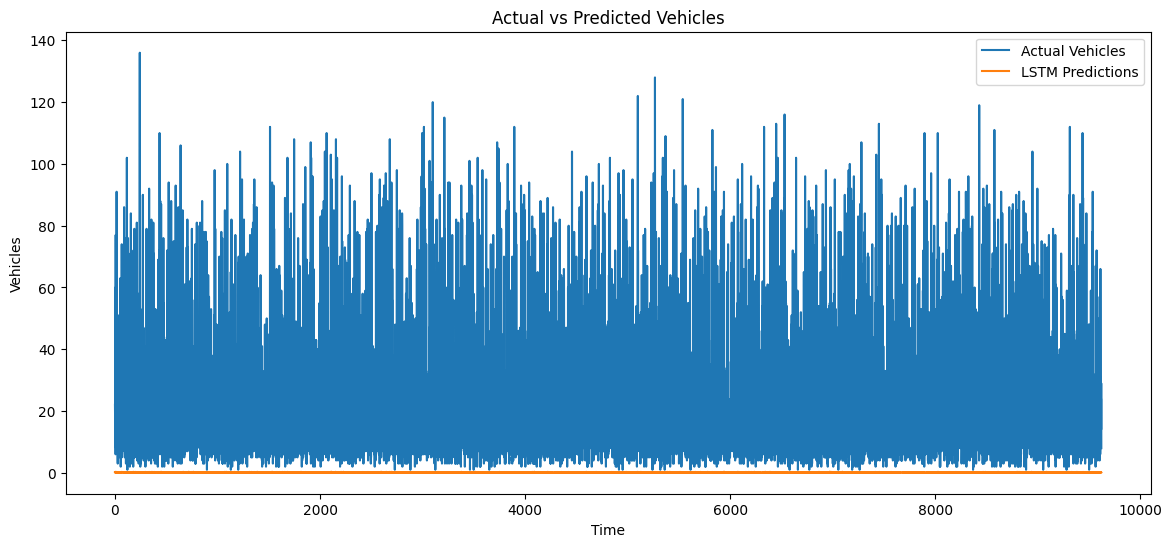

In [39]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Vehicles')
plt.plot(y_pred_lstm, label='LSTM Predictions')
plt.title('Actual vs Predicted Vehicles')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

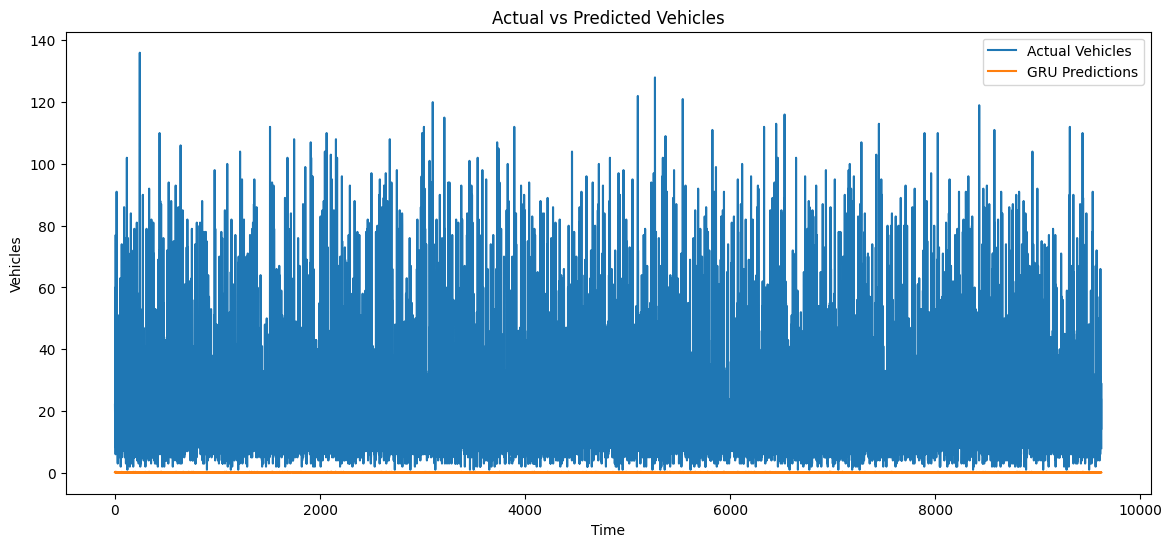

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Vehicles')
plt.plot(y_pred_gru, label='GRU Predictions')
plt.title('Actual vs Predicted Vehicles')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

Proposed architecture implementation

In [41]:
# Load the data
df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/traffic.csv')

# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [42]:
df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [43]:
df = df.sort_values('DateTime')

In [44]:
print("Number of samples per junction:")
print(df['Junction'].value_counts())

Number of samples per junction:
Junction
1    14592
2    14592
3    14592
4     4344
Name: count, dtype: int64


In [45]:
data = df[['Junction', 'Vehicles']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [46]:
data_scaled

array([[0.        , 0.07821229],
       [0.33333333, 0.02793296],
       [0.66666667, 0.04469274],
       ...,
       [0.66666667, 0.2122905 ],
       [0.33333333, 0.1452514 ],
       [1.        , 0.06145251]])

In [47]:
# Create sequences for the model
def create_sequences(data, seq_length):
    X, y, junction_info = [], [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])  # Use all columns except the last as features
        y.append(data[i+seq_length, -1])    # Use the last column as the target
        junction_info.append(df.iloc[i + seq_length]['Junction'])  # Track junction information
    return np.array(X), np.array(y), np.array(junction_info)

seq_length = 24  # Sequence length
X, y, junction_info = create_sequences(data_scaled, seq_length)

In [48]:
print("\nNumber of sequences per junction:")
print(pd.Series(junction_info).value_counts())


Number of sequences per junction:
3    14584
1    14584
2    14584
4     4344
Name: count, dtype: int64


In [49]:
# Split the data into training and testing sets with stratification on junction_info
X_train, X_test, y_train, y_test, junction_train, junction_test = train_test_split(
    X, y, junction_info, test_size=0.2, random_state=42, stratify=junction_info
)

# Verify that all junctions are present in both training and testing sets
print("Unique junctions in training set:", np.unique(junction_train))
print("Unique junctions in testing set:", np.unique(junction_test))

Unique junctions in training set: [1 2 3 4]
Unique junctions in testing set: [1 2 3 4]


In [50]:
np.unique(X_train)

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [51]:
# Define the Model Architecture
model = Sequential([
    GRU(150, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Layer 1
    Dense(100, activation='relu'),  # Layer 2
    Dropout(0.2),  # Layer 3
    GRU(150, activation='tanh', return_sequences=True),  # Layer 4
    Dense(100, activation='relu'),  # Layer 5
    Dropout(0.2),  # Layer 6
    GRU(50, activation='tanh', return_sequences=True),  # Layer 7
    Dense(100, activation='relu'),  # Layer 8
    Dropout(0.2),  # Layer 9
    Bidirectional(LSTM(200, activation='tanh', return_sequences=True)),  # Layer 10
    GRU(50, activation='tanh', return_sequences=True),  # Layer 12
    Dropout(0.2),  # Layer 13
    GRU(50, activation='tanh'),  # Layer 14
    Dropout(0.2),  # Layer 15
    Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
# Compile the Model
optimizer = SGD(learning_rate=0.001, momentum=0.9, decay=1e-7)
model.compile(optimizer=optimizer, loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [53]:
history = model.fit(X_train, y_train, epochs=64, batch_size=150, validation_data=(X_test, y_test), verbose=1)

Epoch 1/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 115s 411ms/step - loss: 0.0155 - val_loss: 0.0134
Epoch 2/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 103s 401ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 3/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 106s 413ms/step - loss: 0.0137 - val_loss: 0.0134
Epoch 4/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 106s 413ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 5/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 104s 406ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 6/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 105s 409ms/step - loss: 0.0133 - val_loss: 0.0134
Epoch 7/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 142s 408ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 8/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 104s 405ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 9/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 105s 408ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 10/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 105s 409ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 11/64
257/257 ━━━━━━━━━━━━━━━━━━━━ 105s 408ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 12

In [54]:
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred), axis=1))[:, -1]
y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test.reshape(-1, 1)), axis=1))[:, -1]

301/301 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step


In [55]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"RMSE: {rmse}")

RMSE: 20.473362462927103


In [56]:
from sklearn.metrics import mean_squared_error

# Get unique junctions
junctions = df['Junction'].unique()

# Iterate over each junction
for junction in junctions:
    # Filter test data for the current junction using junction_test
    junction_mask = junction_test == junction
    junction_X_test = X_test[junction_mask]
    junction_y_test = y_test[junction_mask]
    
    if len(junction_X_test) > 0:
        # Predict for the current junction
        junction_y_pred = model.predict(junction_X_test)
        
        # Inverse transform the predictions and actual values
        # Create a dummy array to inverse transform (since scaler expects the same shape as input)
        dummy_X = np.zeros((len(junction_X_test), 2))  # 2 columns: Junction and Vehicles
        dummy_X[:, -1] = junction_y_pred.flatten()  # Fill Vehicles column with predictions
        junction_y_pred_actual = scaler.inverse_transform(dummy_X)[:, -1]  # Extract inverse-transformed Vehicles
        
        dummy_X[:, -1] = junction_y_test.flatten()  # Fill Vehicles column with actual values
        junction_y_test_actual = scaler.inverse_transform(dummy_X)[:, -1]  # Extract inverse-transformed Vehicles
        
        # Calculate RMSE
        junction_rmse = np.sqrt(mean_squared_error(junction_y_test_actual, junction_y_pred_actual))
        print(f"RMSE for Junction {junction}: {junction_rmse}")
    else:
        print(f"No test data for Junction {junction}")

92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step
RMSE for Junction 1: 31.434171961829126
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step
RMSE for Junction 2: 10.835787358214898
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
RMSE for Junction 3: 13.510229034497527
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
RMSE for Junction 4: 17.791471540098353


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


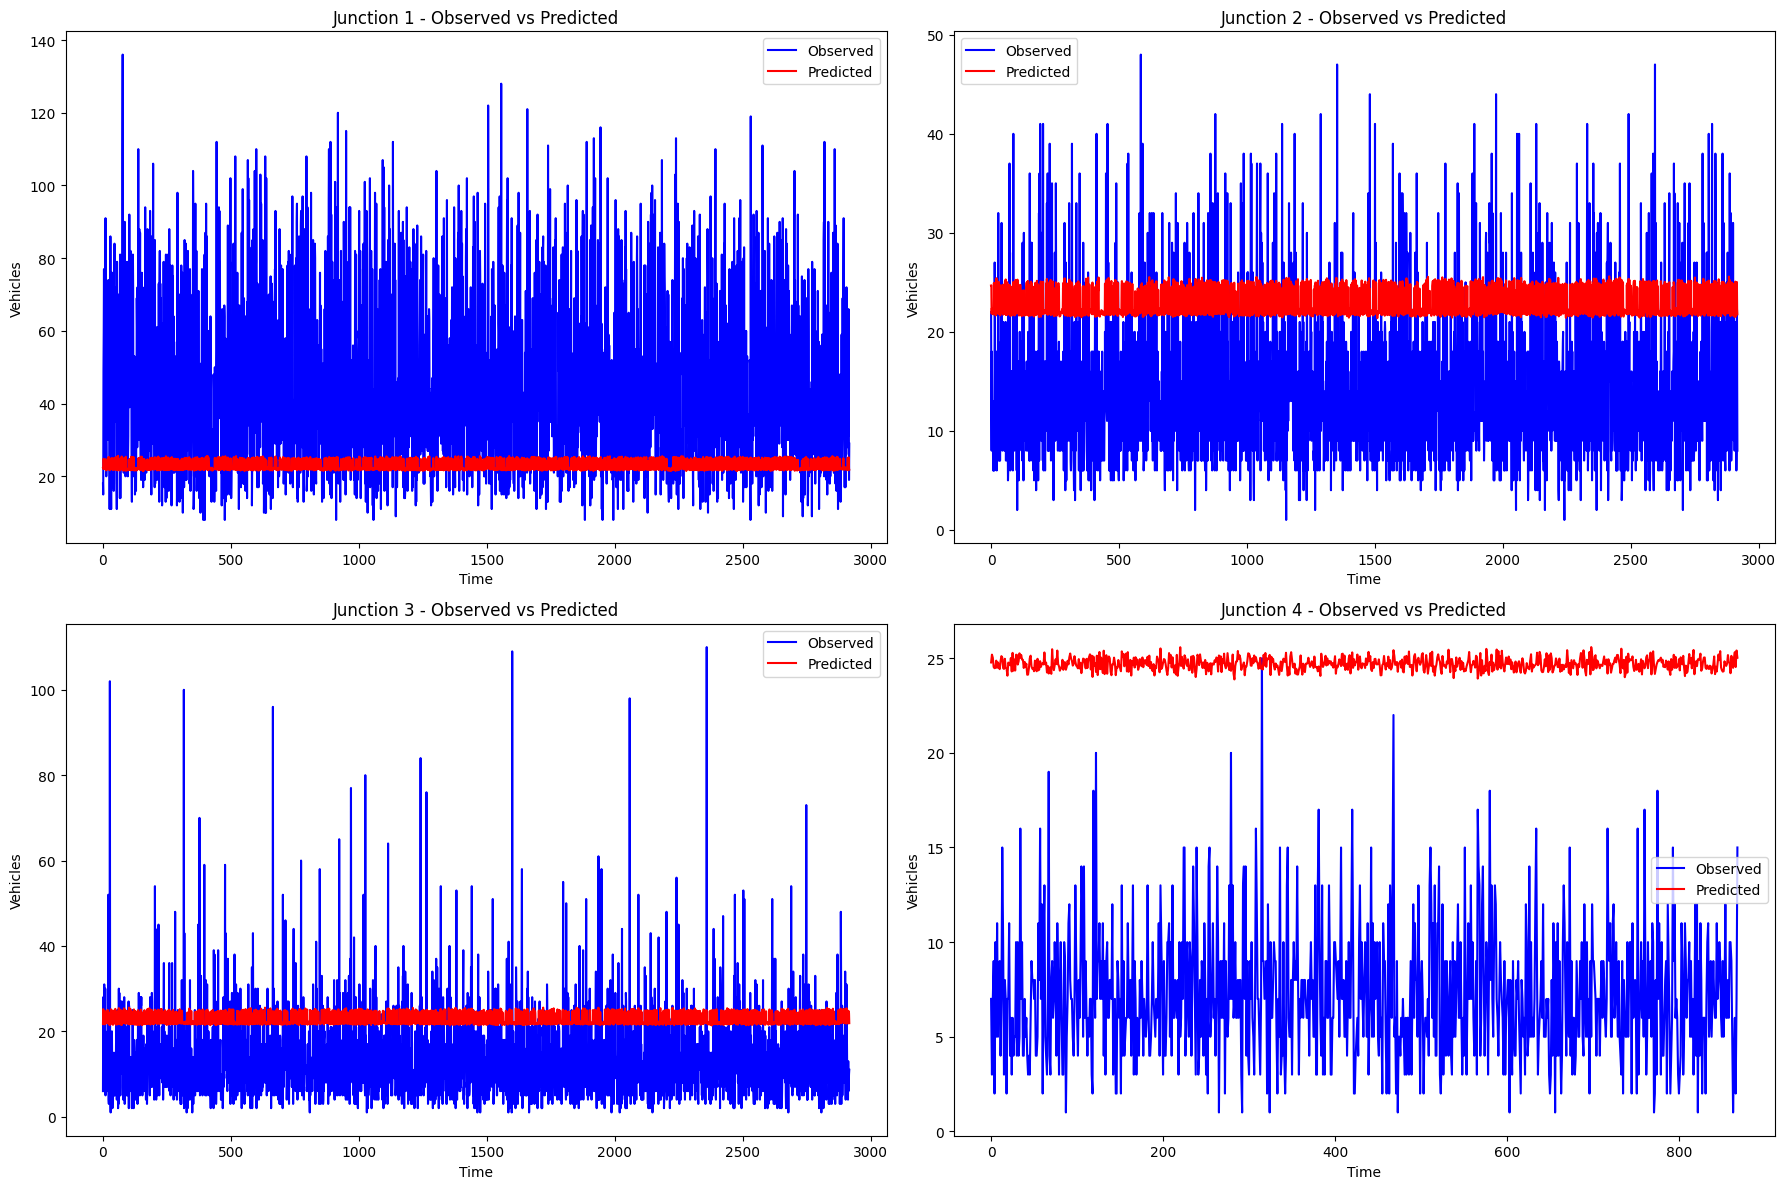

In [57]:
import matplotlib.pyplot as plt

# Step 1: Predict for each junction
junctions = df['Junction'].unique()

# Create a figure with subplots for each junction
plt.figure(figsize=(18, 12))

for i, junction in enumerate(junctions, 1):
    # Filter test data for the current junction using junction_test
    junction_mask = junction_test == junction
    junction_X_test = X_test[junction_mask]
    junction_y_test = y_test[junction_mask]
    
    if len(junction_X_test) > 0:
        # Predict for the current junction
        junction_y_pred = model.predict(junction_X_test)
        
        # Inverse transform the predictions and actual values
        # Create a dummy array to inverse transform (since scaler expects the same shape as input)
        dummy_X = np.zeros((len(junction_X_test), 2))  # 2 columns: Junction and Vehicles
        dummy_X[:, -1] = junction_y_pred.flatten()  # Fill Vehicles column with predictions
        junction_y_pred_actual = scaler.inverse_transform(dummy_X)[:, -1]  # Extract inverse-transformed Vehicles
        
        dummy_X[:, -1] = junction_y_test.flatten()  # Fill Vehicles column with actual values
        junction_y_test_actual = scaler.inverse_transform(dummy_X)[:, -1]  # Extract inverse-transformed Vehicles
        
        # Plot observed vs predicted for the current junction
        plt.subplot(2, 2, i)
        plt.plot(junction_y_test_actual, label='Observed', color='blue')
        plt.plot(junction_y_pred_actual, label='Predicted', color='red')
        plt.title(f'Junction {junction} - Observed vs Predicted')
        plt.xlabel('Time')
        plt.ylabel('Vehicles')
        plt.legend()
    else:
        # If no test data for the junction, create an empty subplot
        plt.subplot(2, 2, i)
        plt.title(f'Junction {junction} - No Test Data')
        plt.xlabel('Time')
        plt.ylabel('Vehicles')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()